In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
tf.set_random_seed(777)

In [2]:
# < Data Loading >

#Pandas 이용하여 DATA 불러오기 / DATA 살펴보기

data = pd.read_csv('AMZN.csv').set_index('Date').astype(np.float)
data.index = pd.to_datetime(data.index,format = '%Y-%m-%d')
print(data.info())                                          # DATA 요약
data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5178 entries, 1997-05-15 to 2017-12-08
Data columns (total 5 columns):
Open      5178 non-null float64
High      5178 non-null float64
Low       5178 non-null float64
Volume    5178 non-null float64
Close     5178 non-null float64
dtypes: float64(5)
memory usage: 242.7 KB
None


,Open,High,Low,Volume,Close
Date,,,,,
1997-05-15,2.437500,2.500000,1.927083,72156000.0,1.958333
1997-05-16,1.968750,1.979167,1.708333,14700000.0,1.729167
1997-05-19,1.760417,1.770833,1.625000,6106800.0,1.708333
1997-05-20,1.729167,1.750000,1.635417,5467200.0,1.635417
1997-05-21,1.635417,1.645833,1.375000,18853200.0,1.427083
1997-05-22,1.437500,1.447917,1.312500,11776800.0,1.395833
1997-05-23,1.406250,1.520833,1.333333,15937200.0,1.500000
1997-05-27,1.510417,1.645833,1.458333,8697600.0,1.583333
1997-05-28,1.625000,1.635417,1.531250,4574400.0,1.531250


In [3]:
# DataFrame을 tensorflow 연산을 위해 Array로 변경 

data = data.values[0:]
print("data shape: ", data.shape)
data

data shape:  (5178, 5)


array([[2.43750000e+00, 2.50000000e+00, 1.92708300e+00, 7.21560000e+07,
        1.95833300e+00],
       [1.96875000e+00, 1.97916700e+00, 1.70833300e+00, 1.47000000e+07,
        1.72916700e+00],
       [1.76041700e+00, 1.77083300e+00, 1.62500000e+00, 6.10680000e+06,
        1.70833300e+00],
       ...,
       [1.13798999e+03, 1.15589001e+03, 1.13607996e+03, 2.85330000e+06,
        1.15234998e+03],
       [1.15658997e+03, 1.16318994e+03, 1.15100000e+03, 2.50880000e+06,
        1.15979004e+03],
       [1.17040002e+03, 1.17275000e+03, 1.15709998e+03, 2.71153000e+06,
        1.16200000e+03]])

In [4]:
# < DATA 전처리 >
## 정규화 방식 ##

# 1. Standardization
def data_standardization(x):
    x_np = np.asarray(x)
    return (x_np - x_np.mean()) / x_np.std()

# 2. Min-Max scaling
def min_max_scaling(x):
    x_np = np.asarray(x)
    return (x_np - x_np.min()) / (x_np.max() - x_np.min() + 1e-7) # 1e-7은 0으로 나누는 오류 예방차원

# 3. Reverse_min_max_scaling
def reverse_min_max_scaling(org_x, x):
    org_x_np = np.asarray(org_x)
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()


## Input으로 사용되는 가격과 거래량 데이터의 스케일 차이가 크기때문에 각각 정규화 ##


# 가격데이터 정규화
# ['Open','High','Low','Volume','Close']에서 'Low' 까지
price = data[:,:-2]
norm_price = min_max_scaling(price) 
print("price.shape: ", price.shape)
print("price[0]: ", price[0])
print("norm_price[0]: ", norm_price[0])
print("-"*100)

# 거래량형태 데이터를 정규화한다
# ['Open','High','Low','Volume','Close']에서 'Volume'
volume = data[:,-2:-1]
norm_volume =data_standardization(volume) 
print("volume.shape: ", volume.shape)
print("volume[0]: ", volume[0])
print("norm_volume[0]: ", norm_volume[0])
print("-"*100)

# price, volume data 재결합
x = np.concatenate([norm_price, norm_volume], axis=1) 
print("x.shape: ", x.shape)
print("x[0]: ", x[0])    # x의 첫 값
print("x[-1]: ", x[-1])  # x의 마지막 값
print("-"*100)

# y(정답set)는 'Close'
close = data[:,-1:]
y = min_max_scaling(close)
print("y[0]: ",y[0])     # y의 첫 값
print("y[-1]: ",y[-1])   # y의 마지막 값

price.shape:  (5178, 3)
price[0]:  [2.4375   2.5      1.927083]
norm_price[0]:  [0.00092814 0.00097971 0.00050704]
----------------------------------------------------------------------------------------------------
volume.shape:  (5178, 1)
volume[0]:  [72156000.]
norm_volume[0]:  [8.43514071]
----------------------------------------------------------------------------------------------------
x.shape:  (5178, 4)
x[0]:  [9.28143131e-04 9.79706638e-04 5.07040880e-04 8.43514071e+00]
x[-1]:  [ 0.96451605  0.96645482  0.95354329 -0.67636424]
----------------------------------------------------------------------------------------------------
y[0]:  [0.00047093]
y[-1]:  [0.971677]


In [6]:
# 하이퍼파라미터 설정

input_data_column_num = 4  # 입력데이터의 컬럼 개수(Variable 개수) = Input dimension
output_data_column_num = 1 # 결과데이터의 컬럼 개수 

seq_length = 28          # 1개 시퀀스의 길이(시계열데이터 입력 개수)
rnn_cell_hidden_dim = 20   # 각 셀의 (hidden)출력 크기
forget_bias = 1.0          # 망각편향(기본값 1.0)
num_stacked_layers = 1    # stacked LSTM layers 개수
keep_prob = 1             # dropout할 때 keep할 비율

epoch_num = 1000           # 에폭 횟수(학습용전체데이터를 몇 회 반복해서 학습할 것인가 입력)
learning_rate = 0.01       # 학습률

In [7]:
# 입출력용 DATA setting 

dataX = [] # 입력으로 사용될 Sequence Data
dataY = [] # 출력(타켓)으로 사용

for i in range(0, len(y) - seq_length):
    _x = x[i : i+seq_length]
    _y = y[i + seq_length] # 다음 나타날 주가(정답)
    
    dataX.append(_x) # dataX 리스트에 추가
    dataY.append(_y) # dataY 리스트에 추가
dataY

[array([9.59316197e-05]),
 array([9.59316197e-05]),
 array([7.84890503e-05]),
 array([0.00012209]),
 array([0.00010029]),
 array([0.00016134]),
 array([0.00043169]),
 array([0.00050582]),
 array([0.00075873]),
 array([0.00077617]),
 array([0.00097675]),
 array([0.00075001]),
 array([0.00061919]),
 array([0.0008721]),
 array([0.00078489]),
 array([0.00068896]),
 array([0.00063663]),
 array([0.00065844]),
 array([0.00061919]),
 array([0.00075001]),
 array([0.00072384]),
 array([0.00069768]),
 array([0.00077617]),
 array([0.00090699]),
 array([0.00088082]),
 array([0.00083722]),
 array([0.00085466]),
 array([0.00076745]),
 array([0.00068024]),
 array([0.00071512]),
 array([0.00065408]),
 array([0.00075001]),
 array([0.00078053]),
 array([0.00067152]),
 array([0.00067152]),
 array([0.00063663]),
 array([0.00060175]),
 array([0.0005407]),
 array([0.00064535]),
 array([0.00064535]),
 array([0.00060175]),
 array([0.00061047]),
 array([0.00068896]),
 array([0.00079361]),
 array([0.00077181]),


In [8]:
# 학습용/테스트용 데이터 생성

# 전체 train:test 70% : 30%
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size

# 학습용 데이터 생성
trainX = np.array(dataX[0:train_size])
trainY = np.array(dataY[0:train_size])

# 테스트용 데이터 생성
testX = np.array(dataX[train_size:len(dataX)])
testY = np.array(dataY[train_size:len(dataY)])

trainX

array([[[ 9.28143131e-04,  9.79706638e-04,  5.07040880e-04,
          8.43514071e+00],
        [ 5.41416826e-04,  5.50011019e-04,  3.26568604e-04,
          8.96590439e-01],
        [ 3.69538744e-04,  3.78132112e-04,  2.57817536e-04,
         -2.30885721e-01],
        ...,
        [ 1.80472275e-04,  1.97659836e-04,  1.54690522e-04,
         -5.87660051e-01],
        [ 1.89066468e-04,  1.89066468e-04,  1.37502961e-04,
         -8.94681208e-01],
        [ 1.58987206e-04,  1.76175591e-04,  1.37502961e-04,
         -9.33570555e-01]],

       [[ 5.41416826e-04,  5.50011019e-04,  3.26568604e-04,
          8.96590439e-01],
        [ 3.69538744e-04,  3.78132112e-04,  2.57817536e-04,
         -2.30885721e-01],
        [ 3.43756990e-04,  3.60944551e-04,  2.66411729e-04,
         -3.14804837e-01],
        ...,
        [ 1.89066468e-04,  1.89066468e-04,  1.37502961e-04,
         -8.94681208e-01],
        [ 1.58987206e-04,  1.76175591e-04,  1.37502961e-04,
         -9.33570555e-01],
        [ 1.761

In [9]:
tf.reset_default_graph()

# 텐서플로우 플레이스홀더 생성
X = tf.placeholder(tf.float32, [None, seq_length, input_data_column_num])
print("X: ", X)
Y = tf.placeholder(tf.float32, [None, 1])
print("Y: ", Y)

# 검증용 측정지표를 산출하기 위한 targets, predictions를 생성한다
targets = tf.placeholder(tf.float32, [None, 1])
print("targets: ", targets)

predictions = tf.placeholder(tf.float32, [None, 1])
print("predictions: ", predictions)

X:  Tensor("Placeholder:0", shape=(?, 28, 4), dtype=float32)
Y:  Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
targets:  Tensor("Placeholder_2:0", shape=(?, 1), dtype=float32)
predictions:  Tensor("Placeholder_3:0", shape=(?, 1), dtype=float32)


In [10]:
# 모델(LSTM RNN) 생성 + FC layers

def LSTM_cell():
    
    # forget_bias: biases of the forget gate (default: 1) in order to reduce the scale of forgetting in the beginning of the training.
    
    cell = tf.contrib.rnn.BasicLSTMCell(num_units=rnn_cell_hidden_dim, 
                                         state_is_tuple=True, activation=None)
#     if keep_prob < 1.0:
#         cell = tf.contrib.rnn.DropoutWrapper(cell, output_keep_prob=keep_prob)
    return cell

# num_stacked_layers개의 층으로 쌓인 Stacked RNNs 생성
stackedRNNs = [LSTM_cell() for _ in range(num_stacked_layers)]
multi_cells = tf.contrib.rnn.MultiRNNCell(stackedRNNs, state_is_tuple=True) 

# RNN Cell(여기서는 LSTM셀임)들을 연결
outputs, _states = tf.nn.dynamic_rnn(multi_cells, X, dtype=tf.float32)
print("outputs: ", outputs)

# [:, -1]를 잘 살펴보자. LSTM RNN의 마지막 (hidden)출력만을 사용했다.
# 과거 여러 거래일의 주가를 이용해서 다음날의 주가 1개를 예측하기때문에 MANY-TO-ONE형태이다
Y_pred = tf.contrib.layers.fully_connected(outputs[:, -1], output_data_column_num, activation_fn=None)

outputs:  Tensor("rnn/transpose_1:0", shape=(?, 28, 20), dtype=float32)


In [11]:
# Loss function define
loss = tf.reduce_sum(tf.square(Y_pred - Y))

# Optimizer
train = tf.train.AdamOptimizer(learning_rate).minimize(loss)

# RMSE(Root Mean Square Error)
rmse = tf.sqrt(tf.reduce_mean(tf.squared_difference(targets, predictions)))

In [15]:
# Learning 
train_error_summary = [] # 학습용 데이터의 오류를 중간 중간 기록한다
test_error_summary = []  # 테스트용 데이터의 오류를 중간 중간 기록한다
test_predict = ''        # 테스트용데이터로 예측한 결과                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    train_error_summary = [] # 학습용 데이터의 오류를 중간 중간 기록한다
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                test_error_summary = []  # 테스트용 데이터의 오류를 중간 중간 기록한다
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     test_predict = ''        # 테스트용데이터로 예측한 결과

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('Learning Start!')
    
    for epoch in range(epoch_num):
        _, _loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
        
        if ((epoch+1) % 200 == 0) or (epoch == epoch_num-1): # 100번째마다 또는 마지막 epoch인 경우
                
            # 학습용데이터로 rmse오차를 구한다
            train_predict = sess.run(Y_pred, feed_dict={X: trainX})
            train_error = sess.run(rmse, feed_dict={targets: trainY, predictions: train_predict})
            train_error_summary.append(train_error)

            # 테스트용데이터로 rmse오차를 구한다
            test_predict = sess.run(Y_pred, feed_dict={X: testX})
            test_error = sess.run(rmse, feed_dict={targets: testY, predictions: test_predict})
            test_error_summary.append(test_error)

            # 현재 오류를 출력한다
            print("epoch: {}, train_error(A): {}, test_error(B): {}, B-A: {}".format(epoch+1, train_error, test_error, test_error-train_error))
    
    recent_data = np.array([x[len(x)-seq_length : ]])  
    
    # 내일 종가를 예측해본다
    ostest_predict = sess.run(Y_pred, feed_dict={X: recent_data})

    print("ostest_predict", ostest_predict[0])
    ostest_predict = reverse_min_max_scaling(close,ostest_predict) # 금액데이터 역정규화한다
    print("Predicted stock price", ostest_predict[0]) # 예측한 주가를 출력한다
    print("Real price : " , close[len(close)-seq_length : ][0])

IndentationError: unexpected indent (<ipython-input-15-3b2a4dc87d66>, line 5)

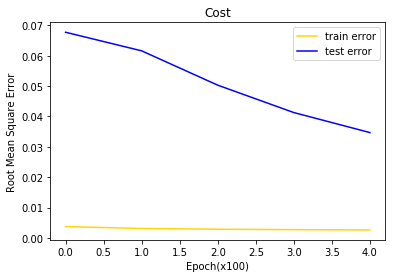

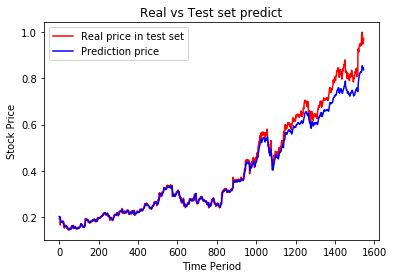

In [12]:
# 결과 그래프 출력
plt.figure(1)
plt.plot(train_error_summary, 'gold',label='train error')
plt.plot(test_error_summary, 'b',label='test error')
plt.title('Cost')
plt.xlabel('Epoch(x100)')
plt.ylabel('Root Mean Square Error')
plt.legend(loc = 'best')

plt.figure(2)
plt.plot(testY, 'r',label='Real price in test set')
plt.plot(test_predict, 'b',label='Prediction price')
plt.title('Real vs Test set predict')
plt.xlabel('Time Period')
plt.ylabel('Stock Price')
plt.legend(loc='best')
plt.show()